In [8]:
data_housing <- read.csv("housing.csv")

In [3]:
str(data_housing)

'data.frame':	1460 obs. of  25 variables:
 $ MSSubClass   : int  60 20 60 70 60 50 20 60 50 190 ...
 $ LotFrontage  : int  65 80 68 60 84 85 75 NA 51 50 ...
 $ LotArea      : int  8450 9600 11250 9550 14260 14115 10084 10382 6120 7420 ...
 $ OverallQual  : int  7 6 7 7 8 5 8 7 7 5 ...
 $ OverallCond  : int  5 8 5 5 5 5 5 6 5 6 ...
 $ YearBuilt    : int  2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 ...
 $ YearRemodAdd : int  2003 1976 2002 1970 2000 1995 2005 1973 1950 1950 ...
 $ MasVnrArea   : int  196 0 162 0 350 0 186 240 0 0 ...
 $ TotalBsmtSF  : int  856 1262 920 756 1145 796 1686 1107 952 991 ...
 $ X1stFlrSF    : int  856 1262 920 961 1145 796 1694 1107 1022 1077 ...
 $ X2ndFlrSF    : int  854 0 866 756 1053 566 0 983 752 0 ...
 $ GrLivArea    : int  1710 1262 1786 1717 2198 1362 1694 2090 1774 1077 ...
 $ BedroomAbvGr : int  3 3 3 3 4 1 3 3 2 2 ...
 $ KitchenAbvGr : int  1 1 1 1 1 1 1 1 2 2 ...
 $ TotRmsAbvGrd : int  8 6 6 7 9 5 7 7 8 5 ...
 $ GarageArea   : int  548 460 6

### Add Missing Value

In [4]:
colSums(is.na(data_housing))

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond 
            0           259             0             0             0 
    YearBuilt  YearRemodAdd    MasVnrArea   TotalBsmtSF     X1stFlrSF 
            0             0             8             0             0 
    X2ndFlrSF     GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd 
            0             0             0             0             0 
   GarageArea    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        MoSold        YrSold     SalePrice 
            0             0             0             0             0

In [9]:
data_housing$LotFrontage[is.na(data_housing$LotFrontage)] <- median(data_housing$LotFrontage, na.rm=TRUE)
data_housing$MasVnrArea[is.na(data_housing$MasVnrArea)] <- median(data_housing$MasVnrArea, na.rm=TRUE)
## karena median lebih robust dibandingkan dengan mean

In [10]:
colSums(is.na(data_housing))

MSSubClass   LotFrontage       LotArea   OverallQual   OverallCond 
            0             0             0             0             0 
    YearBuilt  YearRemodAdd    MasVnrArea   TotalBsmtSF     X1stFlrSF 
            0             0             0             0             0 
    X2ndFlrSF     GrLivArea  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd 
            0             0             0             0             0 
   GarageArea    WoodDeckSF   OpenPorchSF EnclosedPorch    X3SsnPorch 
            0             0             0             0             0 
  ScreenPorch      PoolArea        MoSold        YrSold     SalePrice 
            0             0             0             0             0

In [12]:
library(ggplot2)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


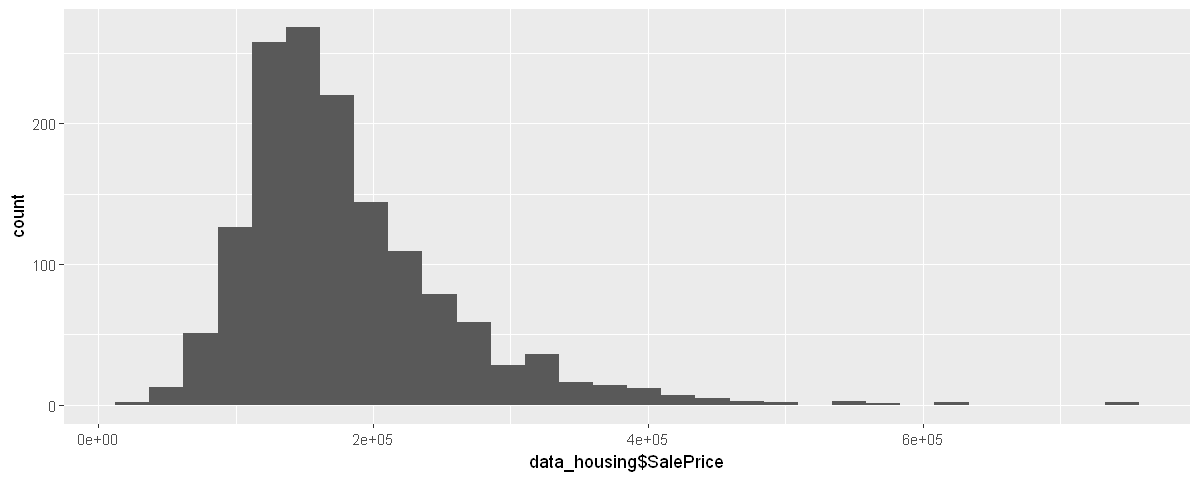

In [24]:
options(repr.plot.width=10, repr.plot.height=4) # Mengatur panjang dan lebar dari plot yang akan dibuat
qplot(data_housing$SalePrice)

In [25]:
SalePrice <- data_housing$SalePrice
data_housing$SalePrice <- log(data_housing$SalePrice)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


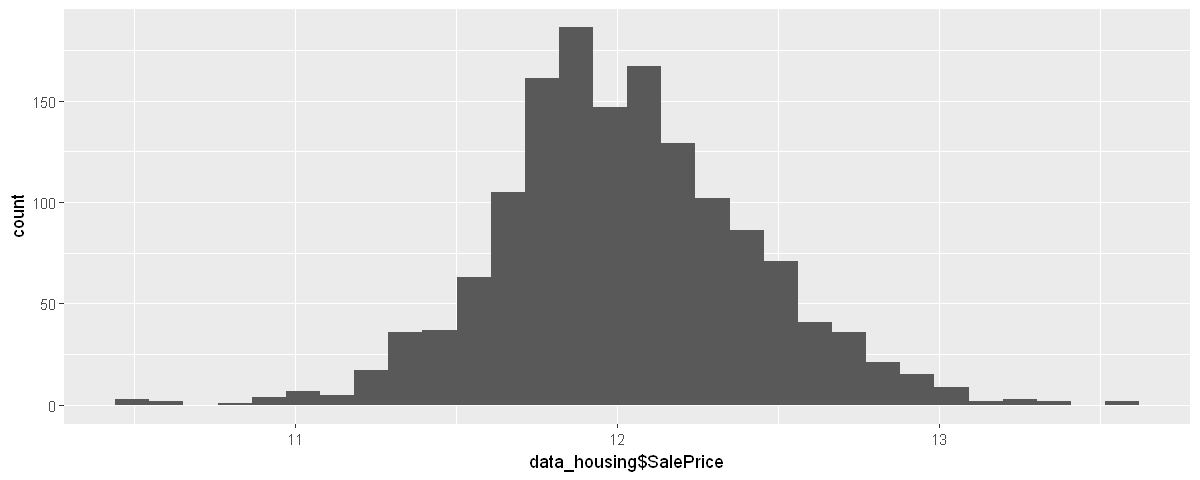

In [26]:
options(repr.plot.width=10, repr.plot.height=4) # Mengatur panjang dan lebar dari plot yang akan dibuat
qplot(data_housing$SalePrice)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


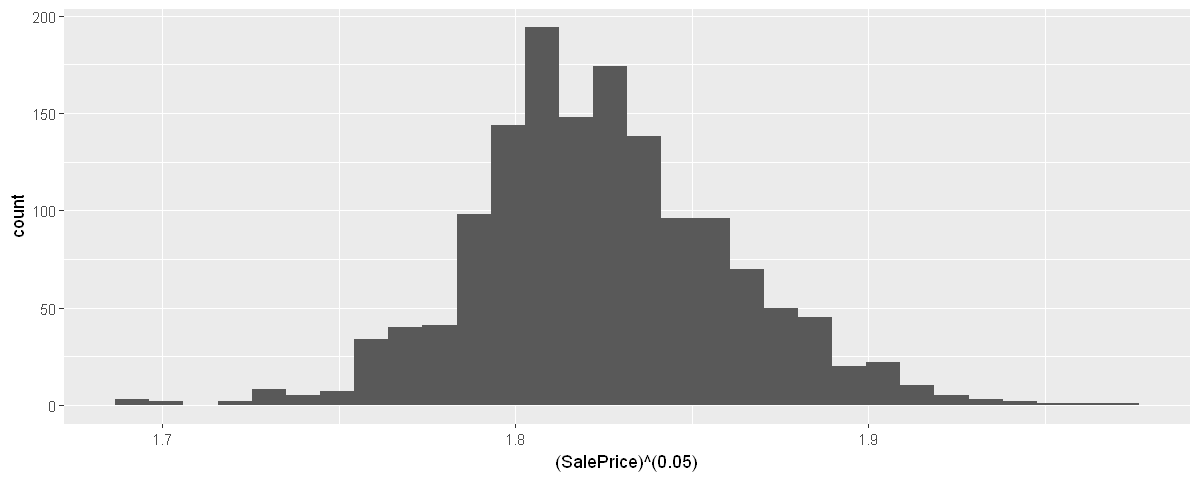

In [37]:
options(repr.plot.width=10, repr.plot.height=4) # Mengatur panjang dan lebar dari plot yang akan dibuat
qplot((SalePrice)^(0.05))

### Linear Regression

In [38]:
model <- lm(SalePrice ~ ., data = data_housing)
summary(model)


Call:
lm(formula = SalePrice ~ ., data = data_housing)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.11715 -0.06900  0.00510  0.08144  0.51917 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)    1.344e+01  6.258e+00   2.147 0.031971 *  
MSSubClass    -4.722e-04  1.218e-04  -3.878 0.000110 ***
LotFrontage   -1.095e-04  2.291e-04  -0.478 0.632886    
LotArea        2.777e-06  4.458e-07   6.228 6.18e-10 ***
OverallQual    8.840e-02  5.127e-03  17.241  < 2e-16 ***
OverallCond    5.059e-02  4.467e-03  11.326  < 2e-16 ***
YearBuilt      3.585e-03  2.471e-04  14.512  < 2e-16 ***
YearRemodAdd   9.916e-04  2.858e-04   3.469 0.000537 ***
MasVnrArea     1.394e-06  2.614e-05   0.053 0.957491    
TotalBsmtSF    6.925e-05  1.775e-05   3.901 0.000100 ***
X1stFlrSF      1.355e-04  8.911e-05   1.520 0.128705    
X2ndFlrSF      9.663e-05  8.744e-05   1.105 0.269299    
GrLivArea      1.197e-04  8.760e-05   1.367 0.171857    
BedroomAbvGr  -9.136e-03  7

### Bootstrap

Panggil Library "boot", jika belum diinstall : install.packages("boot")

In [39]:
library(boot)

Buat function untuk membuat bootstrap linear regression

In [40]:
coef.reg <- function(formula, data, indices) {
    d <- data[indices,] 
    fit <- lm(formula, data = d)
    return(fit$coefficients)
    } 

In [41]:
# bootstrapping with 1000 replications 
set.seed(1)
results <- boot(data = data_housing, statistic = coef.reg, R = 1000,
                formula = SalePrice ~ .)


In [42]:
results


ORDINARY NONPARAMETRIC BOOTSTRAP


Call:
boot(data = data_housing, statistic = coef.reg, R = 1000, formula = SalePrice ~ 
    .)


Bootstrap Statistics :
          original        bias     std. error
t1*   1.343601e+01 -4.861476e-01 5.792652e+00
t2*  -4.722259e-04  5.948717e-05 2.128860e-04
t3*  -1.094584e-04  1.817338e-04 6.207578e-04
t4*   2.776688e-06  8.199624e-08 6.036237e-07
t5*   8.839591e-02 -2.702151e-03 9.837254e-03
t6*   5.059486e-02  7.513807e-04 5.195868e-03
t7*   3.585471e-03 -9.195409e-06 2.586607e-04
t8*   9.915596e-04 -1.055397e-05 2.854134e-04
t9*   1.393631e-06  1.085895e-06 2.502301e-05
t10*  6.925262e-05  1.551787e-05 4.995122e-05
t11*  1.354510e-04  9.270046e-06 7.895307e-05
t12*  9.662914e-05  1.570173e-05 8.379849e-05
t13*  1.197491e-04 -6.021441e-06 7.093979e-05
t14* -9.135908e-03 -1.940394e-03 1.174560e-02
t15* -6.246084e-02 -3.270502e-03 2.399611e-02
t16*  1.738526e-02 -1.159085e-03 6.940458e-03
t17*  2.085264e-04 -2.184006e-06 3.012858e-05
t18*  1.726648e-0

In [43]:
results$t0

(Intercept)    MSSubClass   LotFrontage       LotArea   OverallQual 
 1.343601e+01 -4.722259e-04 -1.094584e-04  2.776688e-06  8.839591e-02 
  OverallCond     YearBuilt  YearRemodAdd    MasVnrArea   TotalBsmtSF 
 5.059486e-02  3.585471e-03  9.915596e-04  1.393631e-06  6.925262e-05 
    X1stFlrSF     X2ndFlrSF     GrLivArea  BedroomAbvGr  KitchenAbvGr 
 1.354510e-04  9.662914e-05  1.197491e-04 -9.135908e-03 -6.246084e-02 
 TotRmsAbvGrd    GarageArea    WoodDeckSF   OpenPorchSF EnclosedPorch 
 1.738526e-02  2.085264e-04  1.726648e-04 -3.655102e-05  1.908245e-04 
   X3SsnPorch   ScreenPorch      PoolArea        MoSold        YrSold 
 2.334576e-04  4.689934e-04 -3.877969e-04  6.257859e-04 -5.906749e-03

In [44]:
results$t

9.597642,-2.106557e-04,5.258064e-04,5.352987e-06,0.07783448,0.06086395,0.003630229,0.0008641679,-1.342476e-05,1.600600e-04,...,0.017115703,0.0001967321,8.304406e-05,-1.767137e-04,-2.746076e-05,-2.606325e-05,0.0003460861,2.921245e-05,-0.0001601132,-0.0039527832
22.093346,-6.846355e-04,-3.724472e-04,2.827169e-06,0.09939308,0.04619381,0.003353357,0.0013046233,1.524191e-05,4.030459e-05,...,0.019051959,0.0002166862,1.493849e-04,8.670969e-06,8.730961e-05,2.334982e-04,0.0005777336,-8.911412e-04,0.0022652716,-0.0102761209
6.745540,-6.749043e-04,-8.242015e-04,2.331238e-06,0.08876109,0.04953012,0.003967921,0.0005695471,1.742854e-05,3.016953e-05,...,0.029429366,0.0001921949,2.358173e-04,-4.634231e-05,2.385357e-04,2.751364e-04,0.0005427212,-3.757971e-04,0.0021728443,-0.0024997766
16.820844,-4.846554e-04,-9.280913e-05,2.984081e-06,0.09390176,0.05079523,0.003766224,0.0008860347,-2.395760e-05,5.228769e-05,...,0.014489636,0.0002136472,1.999815e-04,-1.379658e-04,8.616468e-05,2.627481e-04,0.0003148024,-1.983174e-03,0.0014941339,-0.0077237501
4.118738,-5.335114e-04,-3.115645e-04,2.373980e-06,0.09528071,0.05145404,0.003686281,0.0004196887,-1.195436e-05,4.268393e-05,...,0.019766112,0.0002740965,2.582524e-04,-1.090086e-04,1.920979e-04,3.671610e-04,0.0004315737,-1.214165e-04,-0.0008969053,-0.0008267905
14.672351,-6.410610e-04,-5.035354e-04,2.483388e-06,0.09850749,0.05361673,0.003326644,0.0008271850,3.358474e-05,9.502836e-06,...,0.022686447,0.0002285273,2.740480e-04,1.856708e-05,1.067310e-04,1.484940e-04,0.0005079555,-5.868157e-04,0.0024274404,-0.0061345229
22.898154,-1.489643e-04,1.216823e-03,2.551512e-06,0.07198312,0.04978902,0.003558769,0.0012154965,-6.224851e-06,1.202327e-04,...,0.004424697,0.0002158008,1.163439e-04,-1.419439e-04,1.262910e-04,1.789327e-04,0.0004445278,-2.874218e-04,0.0004784505,-0.0108120816
24.245073,-7.755379e-04,-1.157279e-03,2.074509e-06,0.09073591,0.05125611,0.003991639,0.0006398138,5.512402e-05,1.839591e-05,...,0.019406083,0.0002089925,2.004097e-04,1.256011e-04,1.398576e-04,3.447708e-04,0.0005675059,-6.989736e-04,0.0038425702,-0.0113145218
14.779315,-4.103992e-04,-6.230648e-04,2.605525e-06,0.10826286,0.04774009,0.003382882,0.0007840446,2.280978e-06,-1.885825e-05,...,0.020410945,0.0002217348,2.191930e-04,-3.765909e-05,2.228913e-04,3.991871e-04,0.0005399044,-4.755939e-04,-0.0004888101,-0.0062189950
10.504260,-5.331369e-04,-8.982294e-04,3.185872e-06,0.10440426,0.05296320,0.003808923,0.0010185090,2.383843e-05,-1.075407e-05,...,0.012138803,0.0001968847,2.366368e-04,5.761600e-05,3.354461e-04,5.249008e-04,0.0005967401,-6.650856e-04,0.0012244974,-0.0046828288
20.690634,-4.356984e-04,2.166175e-04,2.825879e-06,0.08240224,0.05322080,0.003852024,0.0010448833,2.940558e-05,1.140315e-04,...,0.011770188,0.0001844929,1.508531e-04,-2.783390e-05,2.983082e-04,2.070564e-04,0.0004442931,-1.065234e-03,0.0005530902,-0.0098185514


In [45]:
colnames(results$t) <- names(results$t0)

In [47]:
head(results$t)

(Intercept),MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,TotalBsmtSF,...,TotRmsAbvGrd,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold
9.597642,-0.0002106557,5.258064e-04,5.352987e-06,0.07783448,0.06086395,0.003630229,0.0008641679,-1.342476e-05,1.600600e-04,...,0.01711570,0.0001967321,8.304406e-05,-1.767137e-04,-2.746076e-05,-2.606325e-05,0.0003460861,2.921245e-05,-0.0001601132,-0.0039527832
22.093346,-0.0006846355,-3.724472e-04,2.827169e-06,0.09939308,0.04619381,0.003353357,0.0013046233,1.524191e-05,4.030459e-05,...,0.01905196,0.0002166862,1.493849e-04,8.670969e-06,8.730961e-05,2.334982e-04,0.0005777336,-8.911412e-04,0.0022652716,-0.0102761209
6.745540,-0.0006749043,-8.242015e-04,2.331238e-06,0.08876109,0.04953012,0.003967921,0.0005695471,1.742854e-05,3.016953e-05,...,0.02942937,0.0001921949,2.358173e-04,-4.634231e-05,2.385357e-04,2.751364e-04,0.0005427212,-3.757971e-04,0.0021728443,-0.0024997766
16.820844,-0.0004846554,-9.280913e-05,2.984081e-06,0.09390176,0.05079523,0.003766224,0.0008860347,-2.395760e-05,5.228769e-05,...,0.01448964,0.0002136472,1.999815e-04,-1.379658e-04,8.616468e-05,2.627481e-04,0.0003148024,-1.983174e-03,0.0014941339,-0.0077237501
4.118738,-0.0005335114,-3.115645e-04,2.373980e-06,0.09528071,0.05145404,0.003686281,0.0004196887,-1.195436e-05,4.268393e-05,...,0.01976611,0.0002740965,2.582524e-04,-1.090086e-04,1.920979e-04,3.671610e-04,0.0004315737,-1.214165e-04,-0.0008969053,-0.0008267905
14.672351,-0.0006410610,-5.035354e-04,2.483388e-06,0.09850749,0.05361673,0.003326644,0.0008271850,3.358474e-05,9.502836e-06,...,0.02268645,0.0002285273,2.740480e-04,1.856708e-05,1.067310e-04,1.484940e-04,0.0005079555,-5.868157e-04,0.0024274404,-0.0061345229


In [54]:
# tidak bisa membandingkan, karena scale-nya tidak sama, jadi harus di-standardisasi

* Bootstrap Estimates of Regression Coefficient

In [49]:
coef_MSSubClass <- mean(results$t[, "MSSubClass"])
coef_MSSubClass

[1] -0.0004127387

In [50]:
coef_TotalBsmtSF <- mean(results$t[, "TotalBsmtSF"])
coef_TotalBsmtSF

[1] 8.477049e-05

In [51]:
coef_GrLivArea <- mean(results$t[, "GrLivArea"])
coef_GrLivArea

[1] 0.0001137277

In [52]:
coef_PoolArea <- mean(results$t[, "PoolArea"], na.rm=TRUE)
coef_PoolArea

[1] -0.0004051063

In [53]:
coef_YrSold <- mean(results$t[, "YrSold"], na.rm=TRUE)
coef_YrSold

[1] -0.005649039

* Booststrap Estimates of Standard Errors

In [55]:
se_MSSubClass <- sd(results$t[, "MSSubClass"])
se_MSSubClass

[1] 0.000212886

In [56]:
se_TotalBsmtSF <- sd(results$t[, "TotalBsmtSF"])
se_TotalBsmtSF

[1] 4.995122e-05

In [57]:
se_GrLivArea <- sd(results$t[, "GrLivArea"])
se_GrLivArea

[1] 7.093979e-05

In [58]:
se_PoolArea <- sd(results$t[, "PoolArea"], na.rm=TRUE)
se_PoolArea

[1] 0.0005788627

In [59]:
se_YrSold <- sd(results$t[, "YrSold"], na.rm=TRUE)
se_YrSold

[1] 0.002922385

* Bootstrap Estimates of Bias

In [60]:
bias_MSSubClass <- results$t0["MSSubClass"] - coef_MSSubClass
bias_MSSubClass

MSSubClass 
-5.948717e-05

In [61]:
bias_TotalBsmtSF <- results$t0["TotalBsmtSF"] - coef_TotalBsmtSF
bias_TotalBsmtSF

TotalBsmtSF 
-1.551787e-05

In [62]:
bias_GrLivArea <- results$t0["GrLivArea"] - coef_GrLivArea
bias_GrLivArea

GrLivArea 
6.021441e-06

In [63]:
bias_PoolArea <- results$t0["PoolArea"] - coef_PoolArea
bias_PoolArea

PoolArea 
1.730935e-05

In [64]:
bias_YrSold <- results$t0["YrSold"] - coef_YrSold
bias_YrSold

YrSold 
-0.0002577099

In [66]:
coef_MSSubClass/se_MSSubClass

[1] -1.938778

In [67]:
coef_GrLivArea/se_GrLivArea

[1] 1.603158

In [68]:
coef_PoolArea/se_PoolArea

[1] -0.6998314

In [69]:
coef_TotalBsmtSF/se_TotalBsmtSF

[1] 1.697066

In [70]:
coef_YrSold/se_YrSold

[1] -1.933024

### Hypothesis Testing with Bootstrap

In [65]:
library(ggplot2)

CI 95%

In [72]:
t_boot_MSSubClass <- results$t[,'MSSubClass']/se_MSSubClass
t_boot_MSSubClass

[1] -0.989523120 -3.215971655 -3.170260847 -2.276595432 -2.506089214
   [6] -3.011286990 -0.699737379 -3.642972316 -1.927788178 -2.504330168
  [11] -2.046627496 -2.018111950 -2.888077310 -1.336792702 -0.045205638
  [16] -2.330826860 -2.063307144 -1.129219803 -2.284854596 -3.339263595
  [21] -1.952988808 -1.480801348 -1.954754145 -2.274522737 -2.464425228
  [26] -2.121128487 -1.728764277 -1.411955579 -3.417900686 -2.187508757
  [31] -1.888415417 -2.695784036 -2.370395239 -0.883036142 -2.585023357
  [36] -1.299052704 -2.257646195 -3.760303995 -3.209366359 -3.478540334
  [41]  0.019122197 -1.898704682 -1.396229741 -1.945022647 -3.338718282
  [46] -0.749210780 -3.184592366 -2.136242055 -1.430687874 -2.291442350
  [51] -0.468954799 -0.734479105 -2.176005387 -1.788429471 -1.913564249
  [56] -1.618708300 -0.852275435 -2.148641409 -2.304495456 -3.013551567
  [61] -2.637949933 -1.963888815 -1.503386852 -4.023346313 -0.741233774
  [66] -3.203699503 -2.577389461 -2.906190320 -3.662534363 -3.852486450
  [71] -0.962001779 -2.345604427 -2.613701548 -0.631277699 -0.763407032
  [76] -2.124088105 -1.769557188 -0.941248214 -0.730260875 -0.936863713
  [81] -2.364057210 -3.223899544 -1.067671125 -2.426325249 -1.311734806
  [86] -0.701211311 -2.353903741 -0.805851844 -3.271382979 -1.950656620
  [91] -0.766929050 -0.899069227 -1.582096532 -1.293519493 -1.561952531
  [96] -1.824616265 -2.634022636 -0.486005154 -2.103250639 -1.120524216
 [101] -2.822927810 -0.328813264 -3.036998901 -1.124323592 -1.374903882
 [106] -2.435514717 -3.596544391 -0.828208892 -1.544535729 -1.302327071
 [111] -0.830793893 -3.342790761 -3.528020868 -1.911988695 -1.204292344
 [116] -1.231414435 -0.541924152 -1.190745959 -1.800615932 -3.090529895
 [121] -2.180435753 -1.401836423 -2.201155487 -2.181504167 -1.352062118
 [126] -1.241932575 -1.047088468 -3.315025833 -0.838322011 -4.103126767
 [131] -1.379598528 -1.052658640 -1.621126055 -1.507350263 -1.204794538
 [136] -1.556107569 -0.430693755 -1.628566320 -3.664277939 -2.662619767
 [141] -2.516252657 -1.755466159 -1.978366725 -2.059097734 -2.188580172
 [146] -2.023826893 -1.613800175 -3.695872670 -2.145910722 -0.940234320
 [151] -2.140739269 -2.647293672 -2.274252261 -2.630450642 -0.871970148
 [156] -0.788344181 -1.489359906 -1.125969409 -0.657426165 -2.220257409
 [161] -1.929440335 -3.150716936 -1.037413086 -0.855137307 -0.612776197
 [166] -2.078048630 -2.427411486 -0.606770620 -0.787267459 -1.389394199
 [171] -1.723009828 -3.341913029 -2.097108739 -2.456043477 -2.113419429
 [176] -0.960588214 -2.358897810 -0.984623434 -0.615925449 -1.410276482
 [181] -0.211514779 -0.566671928 -3.637448407 -2.989972330 -1.965248947
 [186] -0.887188964 -0.846225880 -0.837887129 -2.286202321 -0.467114887
 [191] -1.015695272 -2.164492745 -1.168308249 -0.257762697 -1.586909805
 [196] -1.447703075 -1.226604438 -2.190550886 -3.417575406 -3.170185787
 [201] -3.371792793 -2.255818471 -0.007224527 -1.291099756 -2.087856564
 [206] -0.904376374 -0.784349735 -3.038943466 -1.168842818 -1.799974788
 [211] -1.432511649  0.209193934 -3.158742388 -1.551302117 -0.771998939
 [216] -2.252350264 -4.094960265 -2.161992900 -0.884586804 -1.098357324
 [221] -1.835400899 -0.975157893 -1.884383497 -0.542321613 -3.611572942
 [226] -0.859491808 -0.376338540 -1.812397362 -1.382883471 -2.344389394
 [231] -0.304621658 -1.427394514 -0.550623852 -2.557886661 -0.614384613
 [236] -1.830632964 -2.069126083 -1.337946111 -1.460147887 -1.370781428
 [241] -2.757240602 -2.416984122 -1.219159652 -0.927331695 -3.475204403
 [246] -1.734266721 -1.438937680 -1.635053438 -2.595407696 -3.310566339
 [251] -2.691397854 -1.257465712 -3.755365165 -1.904350307 -0.869185848
 [256] -1.244304292 -1.800977051  0.011318049 -1.870042213 -2.561327009
 [261] -2.973178122 -2.407277959 -4.178266075 -3.727450374 -2.444443180
 [266] -3.195097077 -0.740169659 -0.227738749 -0.683173099 -1.245186118
 [271] -2.946642165 -1.890293781 -1.041397812 -1.266766029 -1.224258725
 [276] -2.925487851 -0.420981734 -4.0488278

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


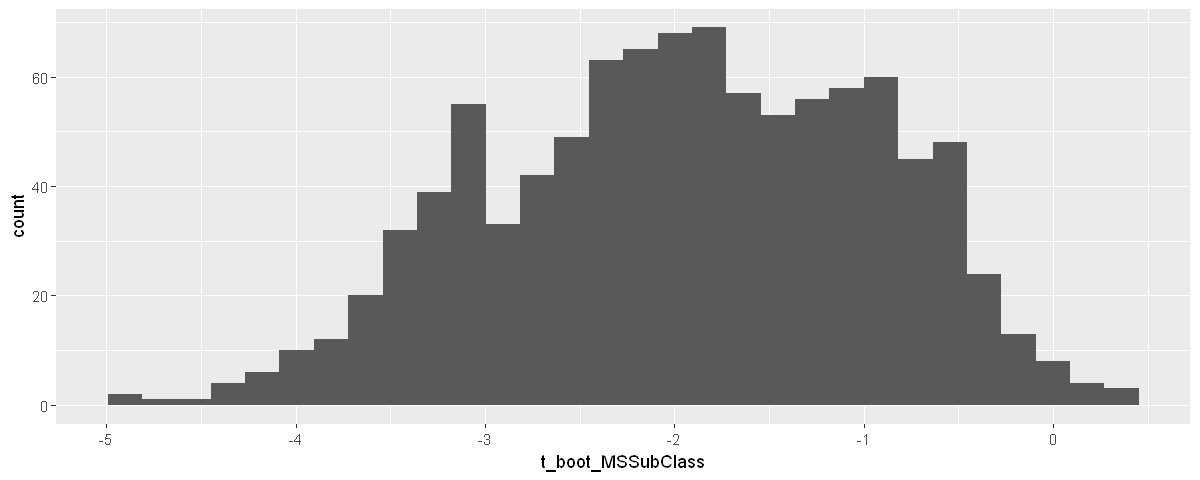

In [73]:
qplot(t_boot_MSSubClass)

In [77]:
sum(t_boot_MSSubClass>0)/1000 # dengan alpha 5%, terbukti bahwa hubungan nilainya negatif

[1] 0.012

In [80]:
t_H0_MSSubClass <- (t_boot_MSSubClass - mean(t_boot_MSSubClass))/sd(t_boot_MSSubClass)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


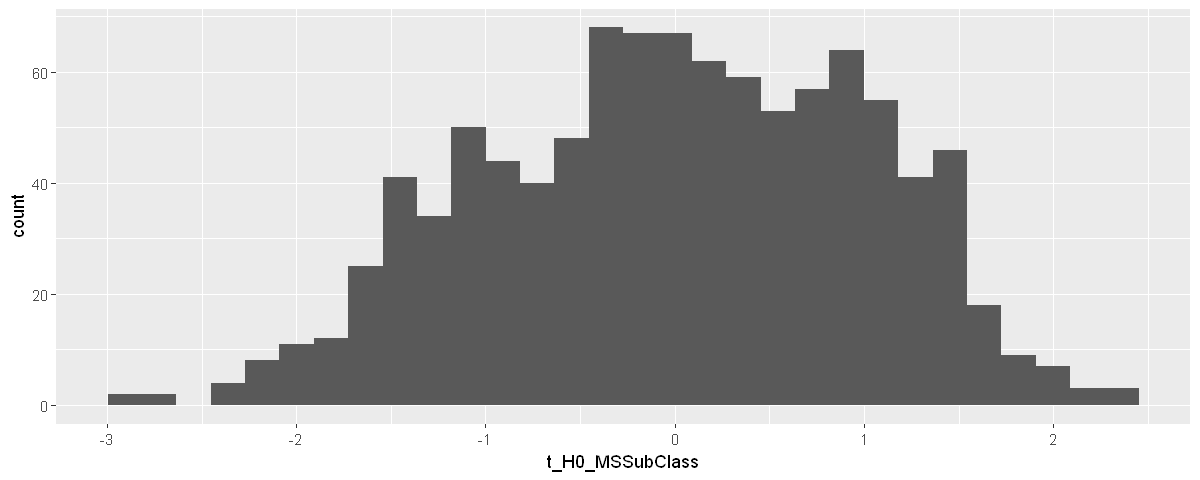

In [81]:
qplot(t_H0_MSSubClass)

In [82]:
t.stat <- results$t0['MSSubClass'] / se_MSSubClass

In [83]:
t.stat

MSSubClass 
  -2.21821

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


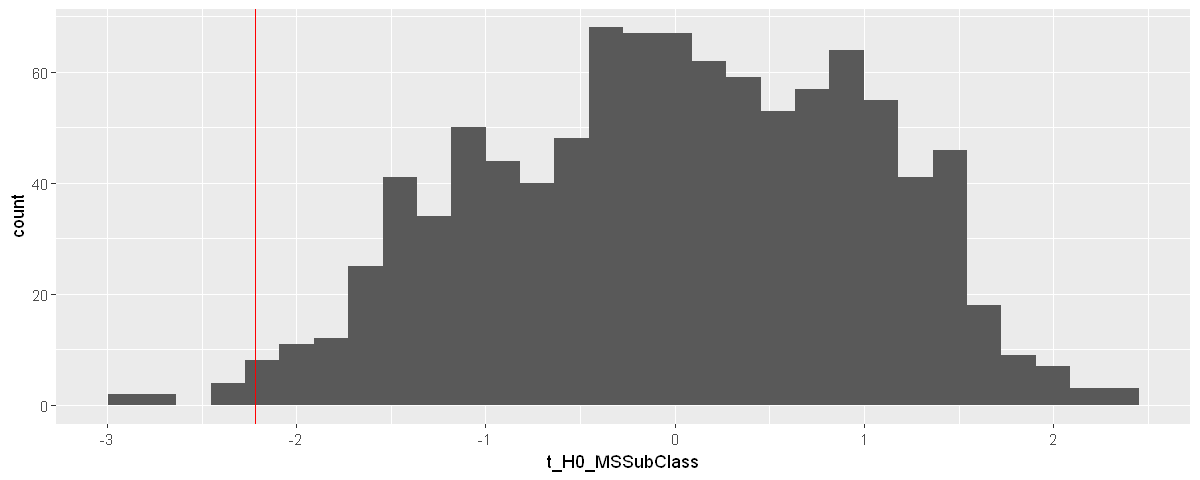

In [86]:
qplot(t_H0_MSSubClass)+geom_vline(xintercept = t.stat, color='red')

In [92]:
p2 <- sum(t_H0_MSSubClass < t.stat)/1000
p2

[1] 0.011

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


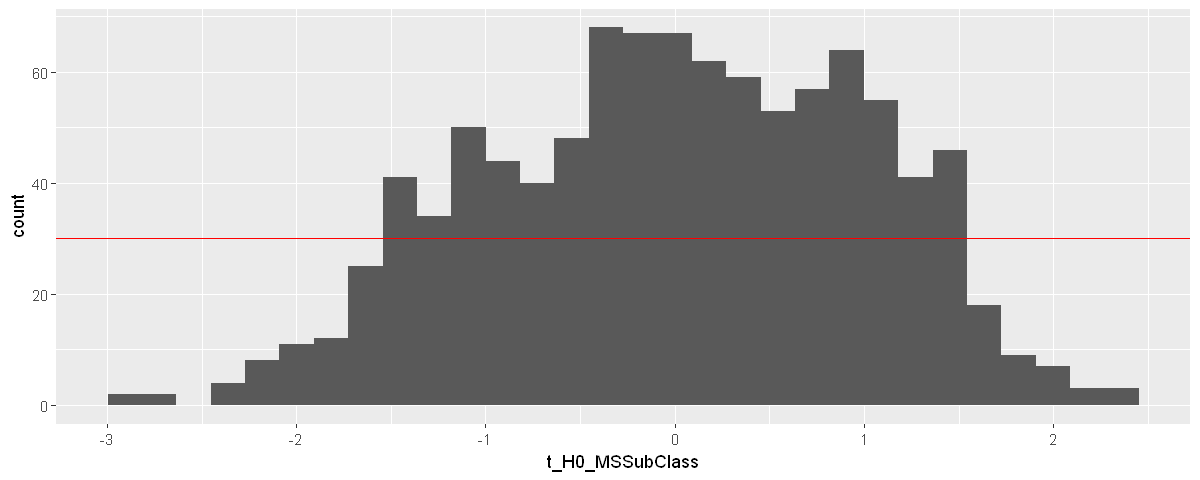

In [89]:
qplot(t_H0_MSSubClass)+geom_hline(yintercept = 30, color='red')

In [37]:
quantile(results$t[, "MSSubClass"], probs = c(0.05, 0.95))

5%        95% 
-211.71926  -60.59999

In [38]:
quantile(results$t[, "TotalBsmtSF"], probs = c(0.05, 0.95))

5%         95% 
 0.03231533 35.34807182

In [44]:
boot.ci(results, type="perc", conf=0.95, index = 10)

BOOTSTRAP CONFIDENCE INTERVAL CALCULATIONS
Based on 1000 bootstrap replicates

CALL : 
boot.ci(boot.out = results, conf = 0.95, type = "perc", index = 10)

Intervals : 
Level     Percentile     
95%   (-3.43, 37.41 )  
Calculations and Intervals on Original Scale

In [41]:
?boot.ci

### Cross Validation

In [93]:
?cv.glm

In [94]:
housing.glm <- glm(SalePrice ~ ., data = data_housing)
(cv.err <- cv.glm(data_housing, housing.glm, K = 10)$delta[1])

[1] 0.02722554

In [95]:
housing.glm <- glm(SalePrice ~ ., data = data_housing)

In [96]:
(cv.err <- cv.glm(data_housing, housing.glm, K = 10)$delta[1])

[1] 0.02724988

In [97]:
housing_glm <- glm(log(SalePrice) ~ ., data = data_housing)

In [102]:
(cv.err <- cv.glm(data_housing, housing_glm, K = 10)$delta[1])

[1] 0.0001926037

In [1]:
install.packages('leaps', repos='http://cran.us.r-project.org')

package 'leaps' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Public\Documents\Wondershare\CreatorTemp\Rtmp4QjIvS\downloaded_packages


### Variable Selection

In [89]:
library(leaps)
## conda install r-leaps

* Best Subset

In [138]:
help(regsubsets)

In [131]:
regfit.full = regsubsets(SalePrice ~ ., data = data_housing, nvmax =25)
regfit.summary <- summary(regfit.full)

In [136]:
cbind(seq(1:24), regfit.summary$rsq)

1,0.6256519
2,0.7141732
3,0.7420670
4,0.7578568
5,0.7668618
6,0.7742486
7,0.7805154
8,0.7858391
9,0.7903055
10,0.7942472
11,0.7963112


In [134]:
cbind(seq(1:24), regfit.summary$adjr2)

1,0.6253951
2,0.7137809
3,0.7415355
4,0.7571912
5,0.7660601
6,0.7733164
7,0.7794573
8,0.7846584
9,0.7890039
10,0.7928272
11,0.7947639


In [112]:
cbind(seq(1:24), regfit.summary$cp)

1,1262.78369
2,621.87848
3,421.29418
4,308.61684
5,245.21618
6,193.56810
7,150.05418
8,113.38952
9,82.95174
10,56.32414
11,43.33362


In [111]:
cbind(seq(1:24), regfit.summary$bic)

1,-1419.979
2,-1806.601
3,-1949.236
4,-2034.179
5,-2082.224
6,-2121.945
7,-2155.761
8,-2184.325
9,-2207.809
10,-2228.228
11,-2235.662


* Forward Selection

In [127]:
regfit.fwd = regsubsets(SalePrice ~ ., data = data_housing, method = "forward", nvmax =26)
regfitfwd.summary <- summary(regfit.fwd)

In [129]:
summary(regfit.fwd)

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = data_housing, method = "forward", 
    nvmax = 26)
24 Variables  (and intercept)
              Forced in Forced out
MSSubClass        FALSE      FALSE
LotFrontage       FALSE      FALSE
LotArea           FALSE      FALSE
OverallQual       FALSE      FALSE
OverallCond       FALSE      FALSE
YearBuilt         FALSE      FALSE
YearRemodAdd      FALSE      FALSE
MasVnrArea        FALSE      FALSE
TotalBsmtSF       FALSE      FALSE
X1stFlrSF         FALSE      FALSE
X2ndFlrSF         FALSE      FALSE
GrLivArea         FALSE      FALSE
BedroomAbvGr      FALSE      FALSE
KitchenAbvGr      FALSE      FALSE
TotRmsAbvGrd      FALSE      FALSE
GarageArea        FALSE      FALSE
WoodDeckSF        FALSE      FALSE
OpenPorchSF       FALSE      FALSE
EnclosedPorch     FALSE      FALSE
X3SsnPorch        FALSE      FALSE
ScreenPorch       FALSE      FALSE
PoolArea          FALSE      FALSE
MoSold            FALSE      FALSE
YrSold  

* Backward Selection

In [137]:
regfit.bcd = regsubsets(SalePrice ~ ., data = data_housing, method = "backward", nvmax =26)
regfitbcd.summary <- summary(regfit.bcd)

In [139]:
summary(regfit.bcd)

Subset selection object
Call: regsubsets.formula(SalePrice ~ ., data = data_housing, method = "backward", 
    nvmax = 26)
24 Variables  (and intercept)
              Forced in Forced out
MSSubClass        FALSE      FALSE
LotFrontage       FALSE      FALSE
LotArea           FALSE      FALSE
OverallQual       FALSE      FALSE
OverallCond       FALSE      FALSE
YearBuilt         FALSE      FALSE
YearRemodAdd      FALSE      FALSE
MasVnrArea        FALSE      FALSE
TotalBsmtSF       FALSE      FALSE
X1stFlrSF         FALSE      FALSE
X2ndFlrSF         FALSE      FALSE
GrLivArea         FALSE      FALSE
BedroomAbvGr      FALSE      FALSE
KitchenAbvGr      FALSE      FALSE
TotRmsAbvGrd      FALSE      FALSE
GarageArea        FALSE      FALSE
WoodDeckSF        FALSE      FALSE
OpenPorchSF       FALSE      FALSE
EnclosedPorch     FALSE      FALSE
X3SsnPorch        FALSE      FALSE
ScreenPorch       FALSE      FALSE
PoolArea          FALSE      FALSE
MoSold            FALSE      FALSE
YrSold 

* Validation Set Evaluation

In [140]:
set.seed(1)

In [144]:
train = sample(c(TRUE, FALSE), nrow(data_housing), rep = TRUE)
test = (!train)

In [156]:
regfit.best = regsubsets(SalePrice ~ ., data = data_housing[train,], nvmax =24)

In [157]:
test.mat = model.matrix (SalePrice ~ ., data = data_housing[test ,])

In [164]:
val.error = rep(NA, 24)
for(i in 1:24){
    coefi = coef(regfit.best, id = i)
    pred = test.mat[, names(coefi)] %*% coefi
    val.error[i] = mean((data_housing$SalePrice[test] - pred)^2)
}

In [166]:
which.min(val.error)

[1] 19

In [167]:
coef(regfit.best, 19)

(Intercept)    MSSubClass   LotFrontage       LotArea   OverallQual 
 1.472087e+06 -2.017456e+02 -2.756132e+02  2.570890e-01  1.943483e+04 
  OverallCond     YearBuilt  YearRemodAdd    MasVnrArea   TotalBsmtSF 
 5.356139e+03  3.743605e+02  9.287851e+01  3.251884e+01  7.310858e+00 
    X1stFlrSF     X2ndFlrSF  BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd 
 5.747389e+01  4.619567e+01 -9.427449e+03 -1.550623e+04  6.323565e+03 
   GarageArea    WoodDeckSF   OpenPorchSF   ScreenPorch        YrSold 
 4.183860e+01  2.936140e+01 -2.527376e+01  8.880020e+01 -1.219325e+03

* k-fold Cross Validation

In [173]:
predict.regsubset = function(object, newdata, id){
    form = as.formula(object$call[[2]])
    mat = model.matrix(form, newdata)
    coefi = coef(object, id = id)
    xvar = names(coefi)
    mat[, xvar] %*% coefi
}

In [169]:
k = 10
set.seed(10)
folds = sample(1:k, nrow(data_housing), replace = TRUE)
cv.error = matrix(NA, k, 24, dimnames = list(NULL, paste (1:24)))

In [177]:
for(j in 1:k){
    regfit.best = regsubsets(SalePrice ~ ., data = data_housing[folds != j,], 
                             nvmax =24)
    for (i in 1:24){
        pred = predict.regsubset(regfit.best, data_housing[folds == j,], id = i)
        cv.error[j, i] = mean((data_housing$SalePrice[folds == j] - pred)^2)
    }
}

In [178]:
cv.error

1,2,3,4,5,6,7,8,9,10,⋯,15,16,17,18,19,20,21,22,23,24
2332458090,1799598146,1403941261,1510858606,1337088943,1297074251,1274630778,1266491173,1193118661,1100997482,⋯,1072042462,1079684542,1080221734,1075179969,1075658827,1075988311,1075633744,1078505159,1082858710,1082847895
2199365420,1549194739,1393681811,1297054646,1242581120,1191767407,1112081197,1101220030,1058555259,1013753351,⋯,950973150,957810224,970364109,965711633,968624805,965664587,974855696,975093471,978339862,975254365
3155200387,3110878790,3887873270,3811964597,3711948214,3678382685,3808014950,3657643297,3635307426,4203676032,⋯,4435449380,4407267590,4314370123,4319557747,4300016369,4304653361,4310066220,4306733461,4309137010,4310377301
2409878406,1653612768,1540430556,1334936556,1325587916,1228307263,1209399527,1178019225,1045914215,946349554,⋯,944949976,960873855,975121412,970395982,972614491,975238090,974454744,969612855,970527706,970517699
3102326741,1972092302,1694098352,1700303722,1603825907,1586111348,1565913832,1540925160,1462519242,1417246380,⋯,1876842684,1889279901,1902423268,1906288302,1915005235,1922028784,1924617837,1915451581,1919034324,1923862285
1557207885,1260670030,1127397042,1046299153,987905313,955459105,947083093,929590903,919364253,862982010,⋯,868736829,876673928,879078570,879384900,879991988,882639812,874563639,872154416,873350347,874381514
2888317863,1768374072,1558849430,1691110742,1671441414,1537501519,1505520569,1396221918,1378620134,1291349564,⋯,1313662123,1287977320,1321377540,1328677554,1339833537,1338047242,1344324689,1341180266,1335788035,1336884279
1906639842,1466599878,1406796176,1190798406,1122041895,1151036118,1164486805,1101782475,1020639542,944095716,⋯,899625503,912911728,913316469,917670761,914632584,919181391,919049316,918988676,919063548,919217864
1938083706,1327242231,1111119075,1064447541,1079063110,1050086422,1006626082,930151893,894766487,830853030,⋯,790247612,788313307,787061823,780409237,780000956,780281337,782186272,779298764,781171323,778216404
2189168567,2240652049,2144550957,1935601957,1884401421,1882927498,1897518981,1840780981,1833033055,1738248391,⋯,1637167217,1653710645,1660681940,1674579946,1674901988,1674022944,1670981641,1669777087,1672472771,1673140906


In [180]:
which.min(colMeans(cv.error))

10 
10

In [182]:
names(coef(regfit.best, 10))

[1] "(Intercept)"  "MSSubClass"   "LotArea"      "OverallQual"  "OverallCond" 
 [6] "YearBuilt"    "MasVnrArea"   "TotalBsmtSF"  "GrLivArea"    "BedroomAbvGr"
[11] "GarageArea"

### Lasso Regression

In [107]:
library(glmnet)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



In [108]:
x = model.matrix(SalePrice ~ ., data_housing)[, -1]
y = data_housing$SalePrice

In [115]:
grid = c(10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1,0.03,0.01,0.003,0.001,0.0003,0.0001)
lasso.mod = glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE) # LASSO alpha 1, RIDGE alpha 0
# lakukan terlebih dahulu standardize

In [116]:
lasso.mod


Call:  glmnet(x = x, y = y, alpha = 1, lambda = grid, standardize = TRUE) 

      Df   %Dev Lambda
 [1,]  0 0.0000  1e+04
 [2,]  0 0.0000  3e+03
 [3,]  0 0.0000  1e+03
 [4,]  0 0.0000  3e+02
 [5,]  0 0.0000  1e+02
 [6,]  0 0.0000  3e+01
 [7,]  0 0.0000  1e+01
 [8,]  0 0.0000  3e+00
 [9,]  0 0.0000  1e+00
[10,]  1 0.1034  3e-01
[11,]  5 0.6934  1e-01
[12,] 10 0.8134  3e-02
[13,] 15 0.8451  1e-02
[14,] 18 0.8511  3e-03
[15,] 23 0.8519  1e-03
[16,] 24 0.8521  3e-04
[17,] 24 0.8522  1e-04

* Validation Set

In [117]:
train = sample(c(TRUE, FALSE), nrow(data_housing), rep = TRUE)
test = (!train)

In [118]:
y.test = y[test]

In [125]:
grid = c(10000, 3000, 1000, 300, 100, 30, 10, 3, 1, 0.3, 0.1,0.03,0.01,0.003,0.001,0.0003,0.0001)
lasso.mod = glmnet(x[train, ], y[train], alpha = 1, lambda = grid, standardize = TRUE)

In [126]:
lasso.score <- rep(NA, length(grid))
for (i in 1:length(grid)){
    lasso.pred = predict(lasso.mod, s = grid[i], newx = x[test, ])
    lasso.score[i] = mean((lasso.pred - y.test)^2)
}

* K-Fold Cross Validation

In [127]:
set.seed(1)
lasso.cv = cv.glmnet(x, y, alpha = 1, lambda = grid, standardize = TRUE)
bestlam = lasso.cv$lambda.min

In [134]:
lasso.cv$lambda

[1] 1e+04 3e+03 1e+03 3e+02 1e+02 3e+01 1e+01 3e+00 1e+00 3e-01 1e-01 3e-02
[13] 1e-02 3e-03 1e-03 3e-04 1e-04

In [133]:
lasso.cv$cvm

[1] 0.15955038 0.15955038 0.15955038 0.15955038 0.15955038 0.15955038
 [7] 0.15955038 0.15955038 0.15955038 0.14329300 0.04993152 0.03131532
[13] 0.02718686 0.02696361 0.02723166 0.02742787 0.02747764

In [128]:
bestlam

[1] 0.003

In [129]:
lasso.best = glmnet(x, y, alpha = 1, lambda = bestlam, standardize = TRUE)

In [131]:
?glmnet

In [130]:
lasso.best$beta

24 x 1 sparse Matrix of class "dgCMatrix"
                         s0
MSSubClass    -4.021396e-04
LotFrontage    .           
LotArea        2.554528e-06
OverallQual    9.182485e-02
OverallCond    4.553402e-02
YearBuilt      3.303338e-03
YearRemodAdd   1.060495e-03
MasVnrArea     .           
TotalBsmtSF    6.669000e-05
X1stFlrSF      4.180493e-05
X2ndFlrSF      .           
GrLivArea      2.105542e-04
BedroomAbvGr   .           
KitchenAbvGr  -5.175899e-02
TotRmsAbvGrd   1.149013e-02
GarageArea     2.129409e-04
WoodDeckSF     1.585702e-04
OpenPorchSF    .           
EnclosedPorch  8.745766e-05
X3SsnPorch     1.328557e-04
ScreenPorch    3.991919e-04
PoolArea      -2.996309e-04
MoSold         .           
YrSold        -3.410569e-03

In [132]:
lasso.best$a0

s0 
8.855068